In [4]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("clean_sleepdata.csv", header = 0)

Mean Squared Error (MSE): 0.010050227669550738
R-squared (R^2) Score: 0.17421553095247522
Time in Bed Input: [[11. ]
 [ 7.7]]
Predicted Sleep Quality: [1.         0.80663996]


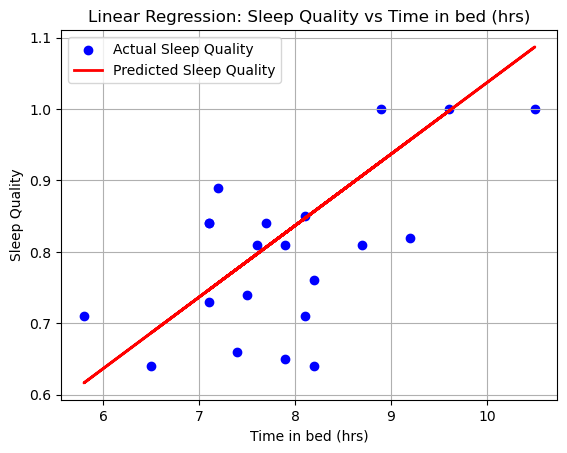

In [16]:
#Linear Regression model for time in bed effect on sleep quality
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data[['Time in bed (hrs)']]
y = data['Sleep Quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
model = LinearRegression()
model.fit(X_train, y_train) # Train the model on the training data
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R^2) Score: {r2}')

import numpy as np
# New data for prediction
new_data = pd.DataFrame({
    'Time in bed (hrs)': [11.0, 7.7]
})
new_data_array = new_data.values
print(f'Time in Bed Input: {new_data.values}')
# Make predictions
new_predictions = model.predict(new_data)
new_predictions = np.where(new_predictions > 1, 1, new_predictions)
print(f'Predicted Sleep Quality: {new_predictions}')

#ScatterPlot of Linear Reg Line with test data
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='blue', label='Actual Sleep Quality')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Sleep Quality')
plt.xlabel('Time in bed (hrs)')
plt.ylabel('Sleep Quality')
plt.title('Linear Regression: Sleep Quality vs Time in bed (hrs)')
plt.legend()
plt.grid(True)
plt.show()

Significant Features: ['Movements per hour', 'Time in bed (hrs)', 'Time asleep (hrs)', 'Time before sleep (mins)', 'Weather temperature (°F)']
Mean Squared Error (MSE): 0.003463223267122177
Predictions on new data:
[0.85579491 0.76158015 0.66736539]


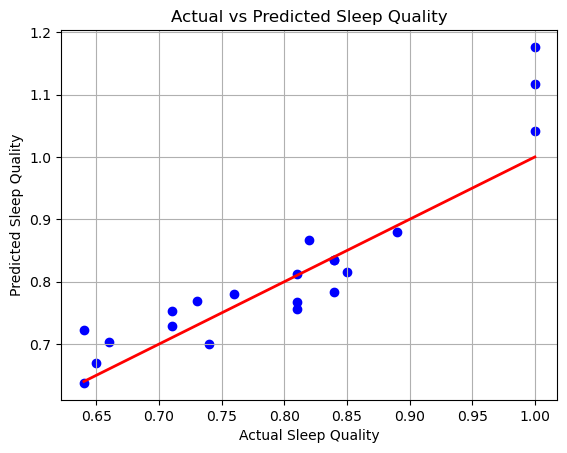

Enter the value for Movements per hour (or 'NA' if not available):  NA
Enter the value for Time in bed (hrs) (or 'NA' if not available):  8
Enter the value for Time asleep (hrs) (or 'NA' if not available):  9
Enter the value for Time before sleep (mins) (or 'NA' if not available):  10
Enter the value for Weather temperature (°F) (or 'NA' if not available):  65


Predicted Sleep Quality: 1.00


In [20]:
#Linear Regression Model to predict Sleep Quality based on variables with atleast moderate correlation (Spearman rank correlation > .3)
from scipy.stats import spearmanr

#Include only numeric data
data_numeric = data.select_dtypes(include=[int, float])
data_numeric.head()

# Define target variable and feature variables
y = data['Sleep Quality']
X = data_numeric.drop(columns=['Sleep Quality'])

# Calculate Spearman correlation for each feature with the target variable
spearman_corr = {}
for col in X.columns:
    spearman_corr[col] = spearmanr(X[col], y)[0]
spearman_corr_df = pd.DataFrame(spearman_corr, index=['Spearman Correlation']).T #Convert to dataframe

# Filter features with Spearman correlation above threshold (e.g., 0.3)
threshold = 0.3
significant_features = spearman_corr_df[abs(spearman_corr_df['Spearman Correlation']) > threshold].index.tolist()
print("Significant Features:", significant_features)

# Retrain the model using only significant features
X_significant = X[significant_features]
X_train, X_test, y_train, y_test = train_test_split(X_significant, y, test_size=0.2, random_state=24)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


# New data for prediction (example)
new_data = pd.DataFrame({
    'Time in bed (hrs)': [9, 8, 7],
    'Time asleep (hrs)': [8, 7, 6]
})

# Ensure the new_data DataFrame has the same structure as the training data
new_data = new_data.reindex(columns=X_significant.columns, fill_value=0)

# Make predictions
predictions = model.predict(new_data)
predictions = np.where(predictions > 1, 1, predictions)
print("Predictions on new data:")
print(predictions)

#Scatterplot of actual Sleep Quality vs Predicted
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line of perfect fit
plt.xlabel('Actual Sleep Quality')
plt.ylabel('Predicted Sleep Quality')
plt.title('Actual vs Predicted Sleep Quality')
plt.grid(True)
plt.show()

# Scatter plots for each significant feature vs Sleep Quality
'''for feature in significant_features:
    sns.scatterplot(x=data[feature], y=data['Sleep Quality'])
    plt.xlabel(feature)
    plt.ylabel('Sleep Quality')
    plt.title(f'Sleep Quality vs {feature}')
    plt.grid(True)
    plt.show()
'''

# Function to get user input and predict sleep quality
def get_user_input(model, significant_features):
    user_input = {}
    for feature in significant_features:
        value = input(f"Enter the value for {feature} (or 'NA' if not available): ")
        if value.upper() != 'NA':
            user_input[feature] = float(value)
    user_data = pd.DataFrame([user_input])
    # Ensure the new_data DataFrame has the same structure as the training data by filling missing columns with 0 (they won't be used in prediction)
    user_data = user_data.reindex(columns=significant_features, fill_value=0)
    # Select only the columns that the user provided
    user_data = user_data.loc[:, user_data.notna().any(axis=0)]
    prediction = model.predict(user_data)
    if prediction > 1:
        prediction = 1
    return prediction

predicted_sleep_quality = get_user_input(model, significant_features)
print(f"Predicted Sleep Quality: {predicted_sleep_quality:.2f}")